In [253]:
### import module
import pandas as pd
import requests as rq
import numpy as np
from bs4 import BeautifulSoup as bsp
import time
import re
import ast
import math

In [254]:
### read the data
dt=pd.read_csv("raw_final_data.csv")
dt=dt.drop(dt.columns[0], axis=1)
dt.head()

,Name,NameEng,MtimePage,ReleaseDate,BoxOffice,BoxOfficeDetail,BoxOfficeRankCN,BoxOfficeRankNA,BoxOfficeRankG,MtimeRating,NumberofReviewers,BoxOfficeGlobal,Runtime,Genre,FilmFormat,ActorAndStaff,AwardSummary,AwardDetail,ProductionCompany,DistributorCompany
0,战狼2,Wolf Warriors Ⅱ,http://movie.mtime.com/229733,2017年07月27日,56.82亿CNY,首日1.02亿|首周9.97亿|连冠4周,1.0,NaN,61.0,7.4,17009,8.70亿USD,123分钟,动作/战争,2D/3D/IMAX/中国巨幕,"{'演员 Actor': ['吴京 Jing Wu', '弗兰克·格里罗 Frank Gri...","['本片共获香港金像奖等重要奖项1次，提名6次', ['香港电影金像奖 (2018；第37届...","{'香港电影金像奖': ['(2018；第37届) 提名：1', '提名 #最佳两岸华语电...",制作公司 1. 北京登峰国际文化传播有限公司 2. 嘲风影业（北京）有限公司 ...,发行公司 1. 北京京西文化旅游股份有限公司 2. 北京聚合影联文化传媒有限公...
1,流浪地球,The Wandering Earth,http://movie.mtime.com/218707,2019年02月05日,46.13亿CNY,首日1.88亿|首周19.98亿|连冠2周,2.0,NaN,NaN,7.9,12081,NaN,125分钟,冒险/科幻/剧情,2D/3D/IMAX3D/中国巨幕,"{'演员 Actor': ['吴京 Jing Wu', '屈楚萧 Chu Xiao Qu',...",NaN,NaN,制作公司 1. 中国电影股份有限公司北京电影制片分公司 2. 霍尔果斯登峰国际...,发行公司 1. 中国电影股份有限公司 [中国] 2. 北京京西文化旅游股份有限公...
2,红海行动,Operation Red Sea,http://movie.mtime.com/240425,2018年02月16日,36.51亿CNY,首日1.29亿|首周4.65亿,3.0,NaN,NaN,8.1,10175,NaN,138分钟,动作/剧情,2D/3D/IMAX3D/中国巨幕,"{'演员 Actor': ['张译 Yi Zhang', '黄景瑜 Johnny Huang...","['本片共获香港金像奖等重要奖项6次，提名14次', ['香港电影金像奖 (2019；第38...","{'香港电影金像奖': ['(2019；第38届) 提名：8', '提名 #最佳影片 ...",制作公司 1. 北京博纳影业集团有限公司 [中国] 2. 博纳影业集团股份有限公...,发行公司 1. 博纳影业集团股份有限公司 [中国] 2. 华夏电影发行有限责任公...
3,唐人街探案2,Detective Chinatown 2,http://movie.mtime.com/234873,2018年02月16日,33.98亿CNY,首日3.41亿|首周9.90亿,4.0,NaN,NaN,7.0,5827,NaN,120分钟,喜剧/动作/悬疑,2D/IMAX/中国巨幕,"{'演员 Actor': ['王宝强 Baoqiang Wang', '刘昊然 Haoran...","['本片共获提名5次', ['大众电影百花奖 (2018；第34届) 提名：5']]","{'大众电影百花奖': ['(2018；第34届) 提名：5', '提名 #最佳故事片 ...",制作公司 1. 万达影视传媒有限公司 [中国] 2. 霍尔果斯骋亚影视文化传媒有...,发行公司 1. 五洲电影发行有限公司 [中国] 2. 联瑞(上海)影业有限公司 ...
4,美人鱼,The Mermaid,http://movie.mtime.com/209007,2016年02月08日,33.92亿CNY,首日2.72亿|首周18.18亿|连冠2周,5.0,NaN,NaN,7.4,18216,NaN,93分钟,喜剧/奇幻/爱情,3D/中国巨幕,"{'演员 Actor': ['邓超 Chao Deng', '罗志祥 Show Lo', '...","['本片共获香港金像奖等重要奖项0次，提名8次', ['香港电影金像奖 (2017；第36届...","{'香港电影金像奖': ['(2017；第36届) 提名：8', '提名 #最佳影片 ...",制作公司 1. 中国电影股份有限公司 [中国] 2. 星辉海外有限公司 [中国香...,发行公司 1. 中国电影股份有限公司北京电影发行分公司 [中国] 2. 和和(上...


# Data Cleaning Part

In [255]:
## check data types and convert to correct data types
dt.dtypes

Name                   object
NameEng                object
MtimePage              object
ReleaseDate            object
BoxOffice              object
BoxOfficeDetail        object
BoxOfficeRankCN       float64
BoxOfficeRankNA       float64
BoxOfficeRankG        float64
MtimeRating           float64
NumberofReviewers       int64
BoxOfficeGlobal        object
Runtime                object
Genre                  object
FilmFormat             object
ActorAndStaff          object
AwardSummary           object
AwardDetail            object
ProductionCompany      object
DistributorCompany     object
dtype: object

In [256]:
## date to date 
dt.ReleaseDate=dt.ReleaseDate.apply(lambda x: re.sub(r"日\w*","",x))
dt.ReleaseDate=dt.ReleaseDate.apply(lambda x: re.sub(r"年|月","-",x))
dt.ReleaseDate=pd.to_datetime(dt.ReleaseDate)

In [257]:
## Boxoffice/BoxofficeGlobal to float, and currency conversion, unit unified to million USD
BoxOffice=[]
BoxOfficeCN=[]
BoxOfficeNA=[]
money_local=dt.BoxOffice.apply(lambda x: float(re.sub(r"(亿USD)|(亿CNY)","",x)))
for i in range(len(dt.BoxOffice)):
    if "USD" in dt.BoxOffice[i]:
        BoxOffice.append(round(money_local[i]*100,6))
    else:
        BoxOffice.append(round(0.15*money_local[i]*100,6))
BoxOfficeGlobal=[]
for i in range(len(dt.BoxOffice)):
    x=dt.BoxOfficeGlobal[i]
    try:
        math.isnan(x)
        BoxOfficeGlobal.append(np.NaN)
    except:
        BoxOfficeGlobal.append(re.sub(r"亿USD","",x))
BoxOfficeGlobal=[round(float(i)*100,6) for i in BoxOfficeGlobal]
dt.BoxOffice=BoxOffice
dt.BoxOfficeGlobal=BoxOfficeGlobal

In [258]:
## use ast to convert str representation of lists/dictionary back to their format
AwardSummary=[]
for i in dt.AwardSummary:
    try:
        math.isnan(i)
        AwardSummary.append(np.NaN)
    except:
        AwardSummary.append(ast.literal_eval(i))
ActorAndStaff=[]
for i in dt.ActorAndStaff:
    try:
        math.isnan(i)
        ActorAndStaff.append(np.NaN)
    except:
        ActorAndStaff.append(ast.literal_eval(i))
AwardDetail=[]
for i in dt.AwardDetail:
    try:
        math.isnan(i)
        AwardDetail.append(np.NaN)
    except:
        AwardDetail.append(ast.literal_eval(i))
dt.ActorAndStaff=ActorAndStaff
dt.AwardDetail=AwardDetail
dt.AwardSummary=AwardSummary

In [259]:
## manual clean: Meet the Fockers2, runtime 1h55m
dt.iloc[295,13]=dt.iloc[295,12]
dt.iloc[295,12]="115"

In [260]:
## Runtime to int
dt.Runtime=dt.Runtime.apply(lambda x: re.sub(r"分钟","",x))
dt=dt.astype({"Runtime":int})

In [261]:
dt.BoxOfficeRankCN=dt.BoxOfficeRankCN.fillna(0)
dt.BoxOfficeRankNA=dt.BoxOfficeRankNA.fillna(0)
dt.BoxOfficeRankG=dt.BoxOfficeRankG.fillna(0)
dt=dt.astype({"BoxOfficeRankCN":int,"BoxOfficeRankNA":int,"BoxOfficeRankG":int})

In [262]:
# fill in null in BoxOfficeGlobal with values in BoxOffice
dt.BoxOfficeGlobal=dt.BoxOfficeGlobal.fillna(value=dt.BoxOffice)

In [263]:
# remove extra text in companies
dt.ProductionCompany=dt.ProductionCompany.apply(lambda x: re.sub(r"制作公司 ","",x))

In [264]:
DistributorCompany=[]
for i in range(len(dt.DistributorCompany)):
    x=dt.DistributorCompany[i]
    try:
        math.isnan(x)
        DistributorCompany.append(np.NaN)
    except:
        DistributorCompany.append(re.sub(r"发行公司 ","",x))
dt.DistributorCompany=DistributorCompany

In [265]:
## create year & month column
dt["Year"]=dt.ReleaseDate.apply(lambda x: x.year)
dt["Month"]=dt.ReleaseDate.apply(lambda x: x.month)

In [266]:
## seperate genres
unique_genere=set(dt.Genre.str.split(r"/").sum())
for g in unique_genere:
    dt[g]=dt.Genre.str.contains(g,regex=False)

In [267]:
dt.dtypes

Name                          object
NameEng                       object
MtimePage                     object
ReleaseDate           datetime64[ns]
BoxOffice                    float64
BoxOfficeDetail               object
BoxOfficeRankCN                int64
BoxOfficeRankNA                int64
BoxOfficeRankG                 int64
MtimeRating                  float64
NumberofReviewers              int64
BoxOfficeGlobal              float64
Runtime                        int64
Genre                         object
FilmFormat                    object
ActorAndStaff                 object
AwardSummary                  object
AwardDetail                   object
ProductionCompany             object
DistributorCompany            object
Year                           int64
Month                          int64
悬疑                              bool
奇幻                              bool
冒险                              bool
家庭                              bool
音乐                              bool
惊

In [268]:
dt.head()

,Name,NameEng,MtimePage,ReleaseDate,BoxOffice,BoxOfficeDetail,BoxOfficeRankCN,BoxOfficeRankNA,BoxOfficeRankG,MtimeRating,...,传记,恐怖,爱情,犯罪,歌舞,科幻,战争,动作,剧情,动画
0,战狼2,Wolf Warriors Ⅱ,http://movie.mtime.com/229733,2017-07-27,852.30,首日1.02亿|首周9.97亿|连冠4周,1,0,61,7.4,...,False,False,False,False,False,False,True,True,False,False
1,流浪地球,The Wandering Earth,http://movie.mtime.com/218707,2019-02-05,691.95,首日1.88亿|首周19.98亿|连冠2周,2,0,0,7.9,...,False,False,False,False,False,True,False,False,True,False
2,红海行动,Operation Red Sea,http://movie.mtime.com/240425,2018-02-16,547.65,首日1.29亿|首周4.65亿,3,0,0,8.1,...,False,False,False,False,False,False,False,True,True,False
3,唐人街探案2,Detective Chinatown 2,http://movie.mtime.com/234873,2018-02-16,509.70,首日3.41亿|首周9.90亿,4,0,0,7.0,...,False,False,False,False,False,False,False,True,False,False
4,美人鱼,The Mermaid,http://movie.mtime.com/209007,2016-02-08,508.80,首日2.72亿|首周18.18亿|连冠2周,5,0,0,7.4,...,False,False,True,False,False,False,False,False,False,False


# Analysis Part

In [293]:
dt_global=dt.iloc[100:200]
dt_cn=dt.iloc[0:100]
dt_na=dt.iloc[200:300]

In [309]:
dt_global[dt_global.BoxOfficeRankCN==0][dt_global.BoxOfficeRankNA==0].to_csv("quickfact.csv")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [310]:
## figuring out chinese output in matplot
import matplotlib
# matplotlib.matplotlib_fname()
import matplotlib.pyplot as plt
from matplotlib.font_manager import _rebuild
_rebuild()
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

In [51]:
dt.MtimeRating.describe()

count    201.000000
mean       7.511443
std        0.763491
min        4.700000
25%        7.100000
50%        7.600000
75%        8.000000
max        9.100000
Name: MtimeRating, dtype: float64

In [52]:
dt.BoxOffice.describe() # USD million

count     201.000000
mean      490.725124
std       367.576914
min       106.350000
25%       171.750000
50%       309.000000
75%       822.000000
max      1519.000000
Name: BoxOffice, dtype: float64

In [53]:
dt.BoxOfficeGlobal.describe() # USD million

count     201.000000
mean      615.691045
std       462.295263
min       106.350000
25%       194.550000
50%       691.950000
75%       897.000000
max      2788.000000
Name: BoxOfficeGlobal, dtype: float64

Text(0.5, 0, 'Year')

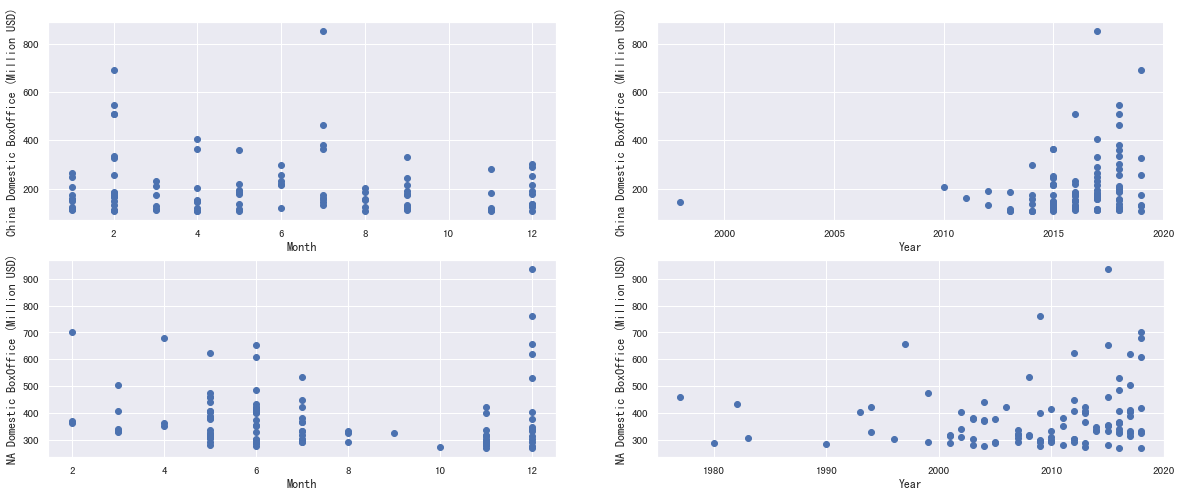

In [313]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,8))
ax[0][0].scatter(x="Month", y="BoxOffice",data=dt_cn)
ax[0][0].set_ylabel('China Domestic BoxOffice (Million USD)')
ax[0][0].set_xlabel('Month')
ax[0][1].scatter(x="Year", y="BoxOffice",data=dt_cn)
ax[0][1].set_ylabel('China Domestic BoxOffice (Million USD)')
ax[0][1].set_xlabel('Year')

ax[1][0].scatter(x="Month", y="BoxOffice",data=dt_na)
ax[1][0].set_ylabel('NA Domestic BoxOffice (Million USD)')
ax[1][0].set_xlabel('Month')
ax[1][1].scatter(x="Year", y="BoxOffice",data=dt_na)
ax[1][1].set_ylabel('NA Domestic BoxOffice (Million USD)')
ax[1][1].set_xlabel('Year')

In [318]:
Month=[]
Month_count=[]
Month_money=[]
for i in dt_cn.Month.unique():
    Month.append(i)
    Month_count.append(len(dt.Month[dt.Month==i]))
    Month_money.append(dt_cn.BoxOffice[dt_cn.Month==i].sum())
dt_cn_month=pd.DataFrame({"Month":Month,"Month_count":Month_count,"Month_money":Month_money})
dt_cn_month["Avg"]=dt_cn_month.Month_money/dt_cn_month.Month_count
dt_cn_month.to_csv("Month_data_cn.csv")
dt_cn_month=dt_cn_month.sort_values(by="Month")

dt_cn_month_sep=dt[["Month","BoxOffice"]].sort_values(by="Month")
dt_cn_month_sep_list=[]
dt_cn_month_sep_list_lab=[]
for m in dt_cn_month_sep.Month.unique():
    dt_cn_month_sep_list_lab.append(m)
    dt_cn_month_sep_list.append(dt_cn_month_sep.BoxOffice[dt_cn_month_sep.Month==m].values.tolist())

In [319]:
Month=[]
Month_count=[]
Month_money=[]
for i in dt_na.Month.unique():
    Month.append(i)
    Month_count.append(len(dt.Month[dt.Month==i]))
    Month_money.append(dt_na.BoxOffice[dt_na.Month==i].sum())
dt_na_month=pd.DataFrame({"Month":Month,"Month_count":Month_count,"Month_money":Month_money})
dt_na_month["Avg"]=dt_na_month.Month_money/dt_na_month.Month_count
dt_na_month.to_csv("Month_data_cn.csv")
dt_na_month=dt_na_month.sort_values(by="Month")

dt_na_month_sep=dt[["Month","BoxOffice"]].sort_values(by="Month")
dt_na_month_sep_list=[]
dt_na_month_sep_list_lab=[]
for m in dt_na_month_sep.Month.unique():
    dt_na_month_sep_list_lab.append(m)
    dt_na_month_sep_list.append(dt_na_month_sep.BoxOffice[dt_na_month_sep.Month==m].values.tolist())

Text(0.5, 0, 'Month')

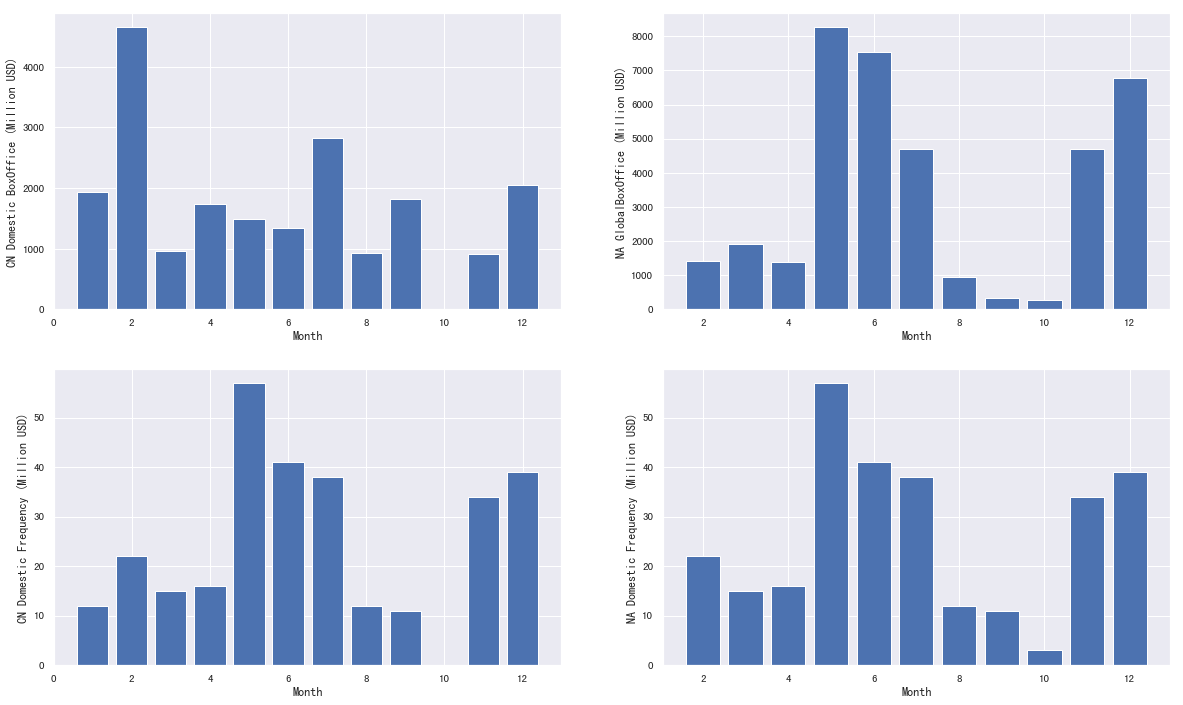

In [321]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
ax[0][0].bar(x="Month", height="Month_money",data=dt_cn_month)
ax[0][0].set_ylabel('CN Domestic BoxOffice (Million USD)')
ax[0][0].set_xlabel('Month')

ax[0][1].bar(x="Month", height="Month_money",data=dt_na_month)
ax[0][1].set_ylabel('NA GlobalBoxOffice (Million USD)')
ax[0][1].set_xlabel('Month')

ax[1][0].bar(x="Month", height="Month_count",data=dt_cn_month)
ax[1][0].set_ylabel('CN Domestic Frequency (Million USD)')
ax[1][0].set_xlabel('Month')

ax[1][1].bar(x="Month", height="Month_count",data=dt_na_month)
ax[1][1].set_ylabel('NA Domestic Frequency (Million USD)')
ax[1][1].set_xlabel('Month')

In [333]:
dt_genre_box=dt_na[["BoxOffice"]+list(unique_genere)]

In [338]:
for i in range(len(dt_genre_box.columns)):
    if i==0:
        continue
    for j in range(len(dt_genre_box.BoxOffice)):
        if dt_genre_box.iloc[j,i]==True:
            dt_genre_box.iloc[j,i]=dt_genre_box.BoxOffice[j]
dt_genre_box_money=dt_genre_box[dt_genre_box.columns[1:]]
#
Genre=[]
Money=[]
Count=[]
for i in unique_genere:
    Genre.append(i)
    Money.append(dt_genre_box_money[i].sum())
    Count.append(dt[i].sum())
dt_genre_count=pd.DataFrame({"Genre":Genre,"Count":Count,"BoxOffice":Money})
#
Genre=[]
Money=[]
for i in range(len(dt.BoxOffice)):
    for g in unique_genere:
        if g in dt.Genre[i]:
            Genre.append(g)
            Money.append(dt.BoxOffice[i])
dt_genre_count_seperate=pd.DataFrame({"Genre":Genre,"BoxOffice":Money})
dt_genre_count_seperate

KeyError: 19

In [327]:
dt_genre_count.to_csv("Genre_BoxOffice.csv")
dt_genre_count_seperate.to_csv("Genre_BoxOffice_sep.csv")

In [328]:
dt_genre_count["Average"]=dt_genre_count.BoxOffice/dt_genre_count.Count
dt_genre_count=dt_genre_count.sort_values(by="Count")

In [329]:
# 
dt_genre_count_seperate_list=[]
dt_genre_count_seperate_list_lab=[]
for g in dt_genre_count.Genre.unique():
    dt_genre_count_seperate_list_lab.append(g)
    dt_genre_count_seperate_list.append(dt_genre_count_seperate.BoxOffice[dt_genre_count_seperate.Genre==g].values.tolist())

[Text(0, 0, '音乐'),
 Text(0, 0, '歌舞'),
 Text(0, 0, '恐怖'),
 Text(0, 0, '传记'),
 Text(0, 0, '战争'),
 Text(0, 0, '悬疑'),
 Text(0, 0, '犯罪'),
 Text(0, 0, '爱情'),
 Text(0, 0, '惊悚'),
 Text(0, 0, '家庭'),
 Text(0, 0, '动画'),
 Text(0, 0, '剧情'),
 Text(0, 0, '科幻'),
 Text(0, 0, '喜剧'),
 Text(0, 0, '奇幻'),
 Text(0, 0, '动作'),
 Text(0, 0, '冒险')]

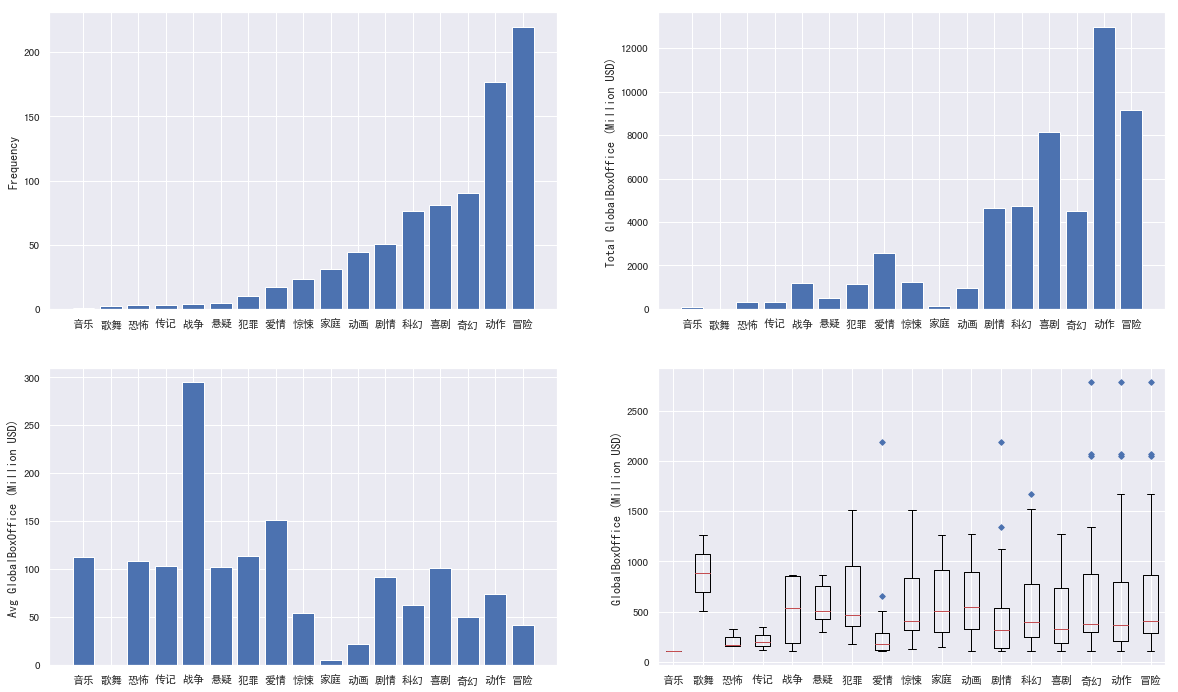

In [330]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
ax[0][0].bar(x="Genre", height="Count",data=dt_genre_count)
ax[0][0].set_ylabel('Frequency')
ax[0][1].bar(x="Genre", height="BoxOffice",data=dt_genre_count)
ax[0][1].set_ylabel('Total GlobalBoxOffice (Million USD)')
ax[1][0].bar(x="Genre", height="Average",data=dt_genre_count)
ax[1][0].set_ylabel('Avg GlobalBoxOffice (Million USD)')
ax[1][1].boxplot(dt_genre_count_seperate_list,flierprops=dict(marker='D', markerfacecolor='b', markersize=4,markeredgecolor='b'),
                medianprops=dict(color='r'))
ax[1][1].set_ylabel("GlobalBoxOffice (Million USD)")
ax[1][1].set_xticklabels(dt_genre_count_seperate_list_lab)

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
ax[0][0].bar(x="Genre", height="Count",data=dt_genre_count)
ax[0][0].set_ylabel('Frequency')
ax[0][0].set_xlabel('China')
ax[0][1].bar(x="Genre", height="Count",data=dt_genre_count)
ax[0][1].set_ylabel('North America')

ax[1][1].boxplot(dt_genre_count_seperate_list,flierprops=dict(marker='D', markerfacecolor='b', markersize=4,markeredgecolor='b'),
                medianprops=dict(color='r'))
ax[1][1].set_ylabel("GlobalBoxOffice (Million USD)")
ax[1][1].set_xticklabels(dt_genre_count_seperate_list_lab)

In [350]:
dt.MtimeRating.describe()
dt[dt.MtimeRating==min(dt.MtimeRating)]

,Name,NameEng,MtimePage,ReleaseDate,BoxOffice,BoxOfficeDetail,BoxOfficeRankCN,BoxOfficeRankNA,BoxOfficeRankG,MtimeRating,...,传记,恐怖,爱情,犯罪,歌舞,科幻,战争,动作,剧情,动画
51,澳门风云3,From Vegas To Macau,http://movie.mtime.com/222326,2016-02-08,167.7,首日1.76亿|首周7.87亿,52,0,0,4.7,...,False,False,False,False,False,False,False,True,False,False


In [349]:
dt.MtimeRating.describe()

count    300.000000
mean       7.630667
std        0.717152
min        4.700000
25%        7.300000
50%        7.600000
75%        8.100000
max        9.100000
Name: MtimeRating, dtype: float64

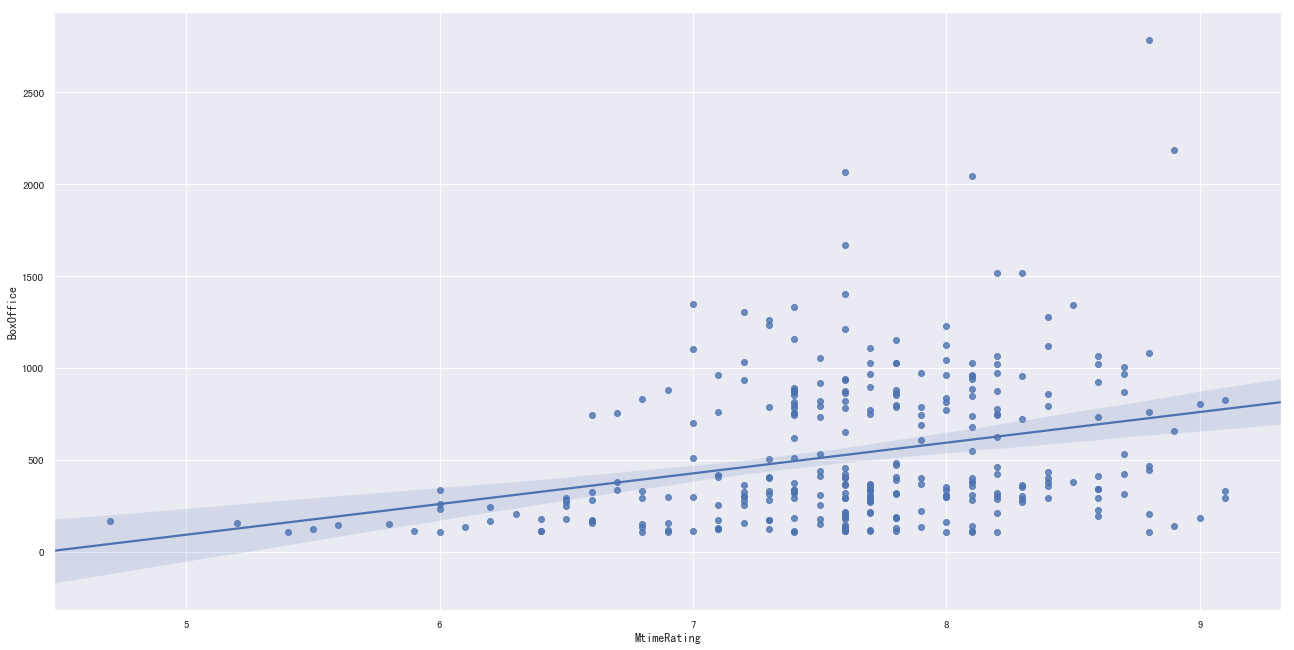

In [348]:
sns.regplot(x="MtimeRating", y="BoxOffice", data=dt)